# DatasetとDataloader

## Dataset

In [76]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import Dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [85]:
train_dataset = torchvision.datasets.MNIST(root = './mnist_data', train = True, download = True)

In [86]:
import sys
sys.getsizeof(train_dataset) # 48バイト

48

In [87]:
image, label = train_dataset[0]

In [88]:
image # PIL形式

In [6]:
type(image)

PIL.Image.Image

In [7]:
label

5

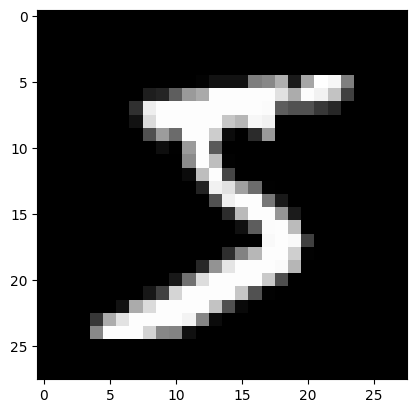

In [8]:
plt.imshow(image, cmap = 'gray')

## Transform

In [89]:
image

In [90]:
# .ToTensor() # 0~255のデータを0~1のデータに変換
image_tensor = torchvision.transforms.ToTensor()(image) # PIL形式からtensorに変換

In [10]:
type(image_tensor)

torch.Tensor

In [11]:
image_tensor.shape

torch.Size([1, 28, 28])

In [91]:
image_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

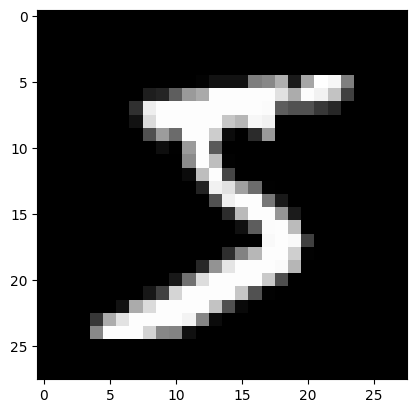

In [12]:
plt.imshow(image_tensor[0], cmap = 'gray')

In [13]:
# .Normalize()
normalized_image_tensor = transforms.Normalize((0.5,), (0.5,))(image_tensor) # 1〜-1に正規化
normalized_image_tensor

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [14]:
normalized_image_tensor.shape

torch.Size([1, 28, 28])

In [15]:
# .Compose()
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])
transformed_image = transform(image)

In [16]:
transformed_image.shape

torch.Size([1, 28, 28])

In [17]:
train_dataset = torchvision.datasets.MNIST(root = './mnist_data', train = True, download = True, transform = transform)
val_dataset = torchvision.datasets.MNIST(root = './mnist_data', train = False, download = True, transform = transform)

In [18]:
image, label = train_dataset[0]
image

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

## Dataloader

In [19]:
train_loader = DataLoader(train_dataset, batch_size = 10, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_dataset, batch_size = 10, num_workers = 2)

In [20]:
train_loader

In [21]:
images, labels = next(iter(train_loader))
print(images.shape) # バッチサイズ, チャネル数, 縦, 横 で出力

torch.Size([10, 1, 28, 28])


In [25]:
grid_images = torchvision.utils.make_grid(images)

In [26]:
grid_images.shape

torch.Size([3, 62, 242])

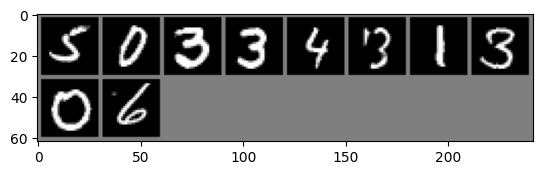

In [30]:
grid_images = grid_images / 2 + 0.5 # 正規化されているデータを元に戻している
plt.imshow(torch.permute(grid_images, dims = (1, 2, 0)))

In [31]:
labels

tensor([5, 0, 3, 3, 4, 3, 1, 3, 0, 6])

### DataLoaderを学習ループで使用する

In [52]:
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()
        self.flatten = nn.Flatten(1, -1)
        self.l1 = nn.Linear(num_in, num_hidden) # 隠れ層(第1層)を定義
        self.l2 = nn.Linear(num_hidden, num_out) # 隠れ層(第2層)を定義

    def forward(self, x):
        x = self.flatten(x)
        # z1 = self.l1(x) 
        # a1 = F.relu(z1)
        # z2 = self.l2(a1)
        x = self.l2(F.relu(self.l1(x)))
        return x

In [72]:
# データ準備
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root = './mnist_data', train = True, download = True, transform = transform)
val_dataset = torchvision.datasets.MNIST(root = './mnist_data', train = False, download = True, transform = transform)
train_loader = DataLoader(train_dataset, batch_size = 10, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_dataset, batch_size = 10, num_workers = 2)
learning_rate = 0.03
train_losses = []
val_losses = []
val_accuracies = []
# モデルの初期化
model = MLP(28*28, 30, 10)
# optimizerの定義
opt = optim.SGD(model.parameters(), lr = learning_rate)

# モデル学習
for epoch in range(5):
    running_loss = 0
    running_val_loss = 0
    running_val_accuracy = 0
    
    for train_batch, data in enumerate(train_loader):

        X, y = data
        opt.zero_grad() # 勾配初期化
        # forward
        preds = model(X)
        loss = F.cross_entropy(preds, y)
        running_loss += loss.item()

        # backward
        loss.backward()
        opt.step() # パラメータ更新
        

    with torch.no_grad():
        for val_batch, data in enumerate(val_loader):
            X_val, y_val = data
            preds_val = model(X_val)
            val_loss = F.cross_entropy(preds_val, y_val)
            running_val_loss += val_loss.item()
            val_accuracy = torch.sum(torch.argmax(preds_val, dim = -1) == y_val) / y_val.shape[0]
            running_val_accuracy += val_accuracy.item()

    train_losses.append(running_loss / (train_batch + 1))
    val_losses.append(running_val_loss / (val_batch + 1))
    val_accuracies.append(running_val_accuracy / (val_batch + 1))
    print(f'epoch:{epoch}, train error:{train_losses[-1]}, val_losses:{val_losses[-1]}, val_accuracy:{val_accuracies[-1]}')

epoch:0, train error:0.3967527266348673, val_losses:0.32079289020993745, val_accuracy:0.9067999933958053
epoch:1, train error:0.2502098824828281, val_losses:0.22278801823378308, val_accuracy:0.9335999943614006
epoch:2, train error:0.2098757201830158, val_losses:0.1886373859529849, val_accuracy:0.9453999946713447
epoch:3, train error:0.1866845248843165, val_losses:0.19789563249453204, val_accuracy:0.9391999941468239
epoch:4, train error:0.17061867828556085, val_losses:0.2057773996429678, val_accuracy:0.93669999396801


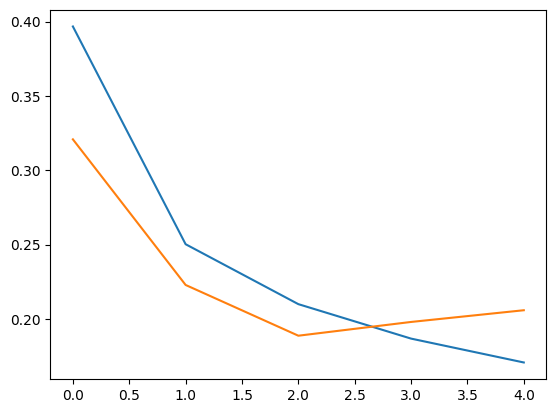

In [73]:
plt.plot(train_losses)
plt.plot(val_losses)

In [34]:
type(images)

torch.Tensor

In [60]:
opt = optim.SGD(model.parameters(), lr = learning_rate)

In [51]:
m = nn.Flatten(1, -1)
n = torch.randn(10, 1, 28, 28)
m(n)

tensor([[-0.6205, -0.3623, -0.7403,  ..., -0.2267,  0.8687,  0.7135],
        [-0.1354, -2.2928,  0.9170,  ...,  0.6087,  0.4543, -1.4222],
        [-1.0007,  0.7282, -0.4203,  ...,  1.0779, -2.2643,  0.6978],
        ...,
        [ 0.4240, -0.5026, -0.0192,  ...,  0.5017, -1.0221,  1.3302],
        [-0.0604, -1.4133,  0.9494,  ..., -0.7482, -0.6154,  0.7540],
        [ 1.1496,  0.4378, -0.9626,  ...,  1.2902, -1.3120, -0.6520]])

In [54]:
model = MLP(28, 30, 10)

In [57]:
model.parameters()

<generator object Module.parameters at 0x7fff2a61b3c0>

### カスタムのDatasetを作成する

In [75]:
class MyDataset(Dataset):
    def __init__(self, X, y, transform = None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        if self.transform:
            X = self.transform(X)
        return X, y

In [92]:
dataset = datasets.load_digits()
data = dataset['data']
target = dataset['target']
images = dataset['images']
images = images * (255. / 16.) # 0~16 -> 0~255
images = images.astype(np.uint8)
X_train, X_val, y_train, y_val = train_test_split(images, target, test_size = 0.2, random_state = 0)

In [93]:
train_mydataset = MyDataset(X_train, y_train)

In [94]:
len(train_mydataset)

1437

In [95]:
train_mydataset[0]

(array([[  0,   0,   0, 143, 239,  31,   0,   0],
        [  0,   0,  79, 255, 175,  15,   0,   0],
        [  0,   0, 207, 239,  15,   0,   0,   0],
        [  0,  31, 255, 175,   0,   0,   0,   0],
        [  0,  31, 255, 175,  63,  63,   0,   0],
        [  0,  31, 239, 255, 255, 223, 159,  15],
        [  0,   0, 143, 255, 111,  47, 239,  95],
        [  0,   0,   0, 111, 239, 255, 255,  95]], dtype=uint8),
 6)

In [98]:
transform = transforms.Compose([
    transforms.ToTensor(), # 0~255 -> 0~1
    transforms.Normalize((0.5, ), (0.5, )) # 0~1 -> -1~1
])

In [101]:
train_mydataset = MyDataset(X_train, y_train, transform = transform)
val_mydataset = MyDataset(X_val, y_val, transform = transform)

In [ ]:
train_myloader = DataLoader(train_mydataset, batch_size = 10, shuffle = True, num_workers = 2)
val_myloader = DataLoader(val_mydataset, batch_size = 10, num_workers = 2)

images, labels = next(iter(train_loader))

In [106]:
images.shape

torch.Size([10, 1, 28, 28])

In [107]:
labels

tensor([9, 6, 1, 7, 0, 4, 3, 2, 5, 9])

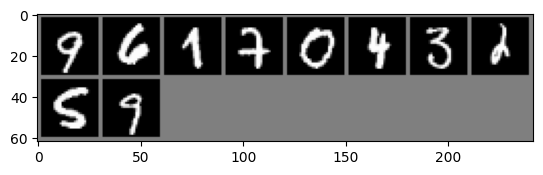

In [117]:
grid_images = torchvision.utils.make_grid(images)
grid_images = grid_images / 2 + 0.5 # 0~1に戻してる
plt.imshow(torch.permute(grid_images, (1, 2, 0)))

In [113]:
grid_images.shape

torch.Size([3, 62, 242])

In [116]:
grid_images

tensor([[[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.0000,  ..., 0.0000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.0000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.0000,  ..., 0.0000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.0000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.0000,  ..., 0.0000, 0.5000, 0.